# Tilføj antal døde med Corona til SSI baseline

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</stule>"))

In [2]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns

import csv

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date
# import datetime

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


## SSI Baselinefil

In [3]:
df_base = pd.read_csv("150322_DataToDownload_total.txt", delimiter = ';', encoding = 'unicode_escape')

In [4]:
df_base

,Dato for upload,ISO-uge,Forventet antal dødsfald,Forventet antal dødsfald - 2 z-score,Forventet antal dødsfald + 2 z-score,Korr. registreret antal dødsfald,Overdødelighed,Z-score
0,2022-03-15,2016-W01,1073.6240,990.763764,1158.673461,1132.000,58.376370,1.378189
1,2022-03-15,2016-W02,1076.9740,993.650596,1162.504435,1105.000,28.026060,0.660990
2,2022-03-15,2016-W03,1079.4410,995.828081,1165.271307,1090.000,10.558610,0.248830
3,2022-03-15,2016-W04,1080.9820,997.273172,1166.910121,1151.000,70.017530,1.633493
4,2022-03-15,2016-W05,1081.5690,997.953243,1167.397815,1123.000,41.430750,0.971792
5,2022-03-15,2016-W06,1081.1900,997.850893,1166.728136,1083.000,1.809910,0.042855
6,2022-03-15,2016-W07,1079.8500,996.970821,1164.906444,1101.000,21.150100,0.502078
7,2022-03-15,2016-W08,1077.5700,995.302080,1161.987416,1170.000,92.429970,2.187271
8,2022-03-15,2016-W09,1074.3880,992.862778,1158.029983,1182.000,107.612300,2.564179
9,2022-03-15,2016-W10,1070.3550,989.672256,1153.118421,1193.000,122.644700,2.946577


In [5]:
# Change name for future refrence use
df_base["ISO_uge"]=df_base["ISO-uge"]

In [6]:
# Add time colums for plotting ease
def addweek(str):
    week = str[-2:]
    return int(week)

df_base["Week"] = df_base.ISO_uge.apply(addweek)

def addyear(str):
    year = str[:4]
    return int(year)

df_base["Year"] = df_base.ISO_uge.apply(addyear)

def addyearweek(year,week):
    yearweek = year+week
    return yearweek

df_base['YearWeek'] = df_base.Year.astype(str) + df_base.Week.apply(lambda x: '{0:0>2}'.format(x))    

In [7]:
df_base

,Dato for upload,ISO-uge,Forventet antal dødsfald,Forventet antal dødsfald - 2 z-score,Forventet antal dødsfald + 2 z-score,Korr. registreret antal dødsfald,Overdødelighed,Z-score,ISO_uge,Week,Year,YearWeek
0,2022-03-15,2016-W01,1073.6240,990.763764,1158.673461,1132.000,58.376370,1.378189,2016-W01,1,2016,201601
1,2022-03-15,2016-W02,1076.9740,993.650596,1162.504435,1105.000,28.026060,0.660990,2016-W02,2,2016,201602
2,2022-03-15,2016-W03,1079.4410,995.828081,1165.271307,1090.000,10.558610,0.248830,2016-W03,3,2016,201603
3,2022-03-15,2016-W04,1080.9820,997.273172,1166.910121,1151.000,70.017530,1.633493,2016-W04,4,2016,201604
4,2022-03-15,2016-W05,1081.5690,997.953243,1167.397815,1123.000,41.430750,0.971792,2016-W05,5,2016,201605
5,2022-03-15,2016-W06,1081.1900,997.850893,1166.728136,1083.000,1.809910,0.042855,2016-W06,6,2016,201606
6,2022-03-15,2016-W07,1079.8500,996.970821,1164.906444,1101.000,21.150100,0.502078,2016-W07,7,2016,201607
7,2022-03-15,2016-W08,1077.5700,995.302080,1161.987416,1170.000,92.429970,2.187271,2016-W08,8,2016,201608
8,2022-03-15,2016-W09,1074.3880,992.862778,1158.029983,1182.000,107.612300,2.564179,2016-W09,9,2016,201609
9,2022-03-15,2016-W10,1070.3550,989.672256,1153.118421,1193.000,122.644700,2.946577,2016-W10,10,2016,201610


## Døde med Corona fra SSI

In [8]:
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 
path_data = rootdir_data + "ssi_data\\"
latestsubdir = list(os.walk(path_data))[0][1][-1]
latestdir = path_data + latestsubdir
df_dode = pd.read_csv(latestdir+'\Deaths_over_time.csv', encoding='utf8',
                          delimiter = ';',decimal=",",thousands='.')
#df_dode = pd.read_csv(latestdir+'\gennembrudsinfektioner_table2_antal_dode.csv', encoding='utf8',
                          #delimiter = ';',decimal=",",thousands='.')

In [9]:
# Fix tid og tilføj year weak
df_dode.drop(df_dode.tail(1).index,inplace=True) 
df_dode['Dato'] = pd.to_datetime(df_dode['Dato'],format='%Y-%m-%d')
df_dode['YearWeek'] = df_dode['Dato'].dt.strftime('%G%V')
df_dode['uge_nr']= df_dode.Dato.dt.week
#df_dode['YearWeek'] = df_dode.Dato.dt.year.astype(str)+df_dode.Dato.dt.week.apply(lambda x: '{0:0>2}'.format(x))
#df_dode['YearWeek'] = pd.to_numeric(df_dode['YearWeek'])

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_2424/1083791635.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_dode['uge_nr']= df_dode.Dato.dt.week


In [10]:
#df_dode['Dato'].values
# [d[-4:] + '-W'+d[4:6]+'-1' for d in df_dode['Dato'].values]

In [11]:
df_dode.tail(70)

,Dato,Antal_døde,YearWeek,uge_nr
658,2021-12-29,9,202152,52
659,2021-12-30,9,202152,52
660,2021-12-31,11,202152,52
661,2022-01-01,12,202152,52
662,2022-01-02,10,202152,52
663,2022-01-03,15,202201,1
664,2022-01-04,15,202201,1
665,2022-01-05,16,202201,1
666,2022-01-06,16,202201,1
667,2022-01-07,17,202201,1


In [12]:
#df_dode.iloc[295]
np.sort(df_dode.YearWeek.unique())

array(['202011', '202012', '202013', '202014', '202015', '202016',
       '202017', '202018', '202019', '202020', '202021', '202022',
       '202023', '202024', '202025', '202026', '202027', '202028',
       '202029', '202030', '202031', '202032', '202033', '202034',
       '202035', '202036', '202037', '202038', '202039', '202040',
       '202041', '202042', '202043', '202044', '202045', '202046',
       '202047', '202048', '202049', '202050', '202051', '202052',
       '202053', '202101', '202102', '202103', '202104', '202105',
       '202106', '202107', '202108', '202109', '202110', '202111',
       '202112', '202113', '202114', '202115', '202116', '202117',
       '202118', '202119', '202120', '202121', '202122', '202123',
       '202124', '202125', '202126', '202127', '202128', '202129',
       '202130', '202131', '202132', '202133', '202134', '202135',
       '202136', '202137', '202138', '202139', '202140', '202141',
       '202142', '202143', '202144', '202145', '202146', '2021

In [13]:
df_dodegroup = df_dode.groupby('YearWeek').sum()
df_dode_new = pd.DataFrame()

df_dode_new['YearWeek'] = df_dodegroup.index
df_dode_new['Døde'] = df_dodegroup["Antal_døde"].values
df_dode_new

,YearWeek,Døde
0,202011,4
1,202012,21
2,202013,59
3,202014,113
4,202015,95
5,202016,75
6,202017,59
7,202018,65
8,202019,34
9,202020,28


In [14]:
# data = []
# unique_yw = df_dode.YearWeek.unique()
# for y_i in unique_yw:
#     df_y_i = df_dode.loc[df_dode["YearWeek"] == y_i]
#     y_i_dode = df_y_i["Antal_døde"].sum()
    
#     data.append([y_i, y_i_dode])

# df_dode_new = pd.DataFrame(data, columns=['YearWeek', 'Døde'])

In [15]:
df_base.tail()

,Dato for upload,ISO-uge,Forventet antal dødsfald,Forventet antal dødsfald - 2 z-score,Forventet antal dødsfald + 2 z-score,Korr. registreret antal dødsfald,Overdødelighed,Z-score,ISO_uge,Week,Year,YearWeek
318,2022-03-15,2022-W06,1169.615,1085.803801,1255.478098,1361.126,191.5110,4.399348,2022-W06,6,2022,202206
319,2022-03-15,2022-W07,1169.164,1085.692566,1254.671326,1347.467,178.3022,4.119725,2022-W07,7,2022,202207
320,2022-03-15,2022-W08,1167.917,1084.951248,1252.895943,1342.550,174.6331,4.061597,2022-W08,8,2022,202208
321,2022-03-15,2022-W09,1165.898,1083.579565,1250.201461,1304.349,138.4513,3.260875,2022-W09,9,2022,202209
322,2022-03-15,2022-W10,1163.143,1081.584505,1246.654317,1312.881,149.7377,3.554439,2022-W10,10,2022,202210


In [16]:
start = df_base.index[df_base['YearWeek']==str(df_dode_new["YearWeek"].iloc[0])].tolist()[0]
end = df_base.index[df_base['YearWeek']==str(df_dode_new["YearWeek"].iloc[-1])].tolist()[0]
df_base_new = df_base.iloc[start:end+1]
df_base_new["YearWeek"] = df_base_new["YearWeek"].apply(int)
df_base_new = df_base_new.reset_index(drop=True)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_2424/3590272985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_new["YearWeek"] = df_base_new["YearWeek"].apply(int)


In [17]:
df_dode_new['YearWeek'].astype(int).equals(df_base_new['YearWeek'].astype(int))

True

In [18]:
df_base_new

,Dato for upload,ISO-uge,Forventet antal dødsfald,Forventet antal dødsfald - 2 z-score,Forventet antal dødsfald + 2 z-score,Korr. registreret antal dødsfald,Overdødelighed,Z-score,ISO_uge,Week,Year,YearWeek
0,2022-03-15,2020-W11,1130.146,1051.228004,1210.945610,1132.000,1.854494,0.046415,2020-W11,11,2020,202011
1,2022-03-15,2020-W12,1127.482,1049.382768,1207.427991,1197.000,69.517590,1.741685,2020-W12,12,2020,202012
2,2022-03-15,2020-W13,1124.253,1047.021218,1203.295564,1168.000,43.746920,1.112510,2020-W13,13,2020,202013
3,2022-03-15,2020-W14,1120.513,1044.141216,1198.661035,1214.000,93.486900,2.387393,2020-W14,14,2020,202014
4,2022-03-15,2020-W15,1116.326,1040.774869,1193.621637,1201.000,84.674370,2.188620,2020-W15,15,2020,202015
5,2022-03-15,2020-W16,1111.760,1036.960055,1188.276713,1137.000,25.239810,0.664654,2020-W16,16,2020,202016
6,2022-03-15,2020-W17,1106.891,1032.751607,1182.724212,1140.000,33.108670,0.878648,2020-W17,17,2020,202017
7,2022-03-15,2020-W18,1101.797,1028.213122,1177.057008,1089.000,-12.797310,-0.344544,2020-W18,18,2020,202018
8,2022-03-15,2020-W19,1096.559,1023.409208,1171.373072,1060.000,-36.558750,-0.993813,2020-W19,19,2020,202019
9,2022-03-15,2020-W20,1091.257,1018.426325,1165.745499,986.000,-105.257300,-2.905717,2020-W20,20,2020,202020


In [19]:
df_dode_new

,YearWeek,Døde
0,202011,4
1,202012,21
2,202013,59
3,202014,113
4,202015,95
5,202016,75
6,202017,59
7,202018,65
8,202019,34
9,202020,28


In [20]:
df_base_new["forventet + døde"] = df_dode_new["Døde"]+df_base_new["Forventet antal dødsfald"]
df_base_new["Forventet antal dødsfald + 2 z-score + døde"] = df_dode_new["Døde"]+df_base_new["Forventet antal dødsfald + 2 z-score"]

In [21]:
df_base_new

,Dato for upload,ISO-uge,Forventet antal dødsfald,Forventet antal dødsfald - 2 z-score,Forventet antal dødsfald + 2 z-score,Korr. registreret antal dødsfald,Overdødelighed,Z-score,ISO_uge,Week,Year,YearWeek,forventet + døde,Forventet antal dødsfald + 2 z-score + døde
0,2022-03-15,2020-W11,1130.146,1051.228004,1210.945610,1132.000,1.854494,0.046415,2020-W11,11,2020,202011,1134.146,1214.945610
1,2022-03-15,2020-W12,1127.482,1049.382768,1207.427991,1197.000,69.517590,1.741685,2020-W12,12,2020,202012,1148.482,1228.427991
2,2022-03-15,2020-W13,1124.253,1047.021218,1203.295564,1168.000,43.746920,1.112510,2020-W13,13,2020,202013,1183.253,1262.295564
3,2022-03-15,2020-W14,1120.513,1044.141216,1198.661035,1214.000,93.486900,2.387393,2020-W14,14,2020,202014,1233.513,1311.661035
4,2022-03-15,2020-W15,1116.326,1040.774869,1193.621637,1201.000,84.674370,2.188620,2020-W15,15,2020,202015,1211.326,1288.621637
5,2022-03-15,2020-W16,1111.760,1036.960055,1188.276713,1137.000,25.239810,0.664654,2020-W16,16,2020,202016,1186.760,1263.276713
6,2022-03-15,2020-W17,1106.891,1032.751607,1182.724212,1140.000,33.108670,0.878648,2020-W17,17,2020,202017,1165.891,1241.724212
7,2022-03-15,2020-W18,1101.797,1028.213122,1177.057008,1089.000,-12.797310,-0.344544,2020-W18,18,2020,202018,1166.797,1242.057008
8,2022-03-15,2020-W19,1096.559,1023.409208,1171.373072,1060.000,-36.558750,-0.993813,2020-W19,19,2020,202019,1130.559,1205.373072
9,2022-03-15,2020-W20,1091.257,1018.426325,1165.745499,986.000,-105.257300,-2.905717,2020-W20,20,2020,202020,1119.257,1193.745499


In [22]:
import datetime
df_base_new["dt_dato"] = np.array([np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[-2:]+'-1', "%Y-W%W-%w")) for d in df_base_new["ISO-uge"]])
df_base_new.loc[df_base_new['ISO-uge'].str.match('2020-'),'dt_dato'] = df_base_new[df_base_new['ISO-uge'].str.match('2020-')]['dt_dato'] - np.timedelta64(7,'D')

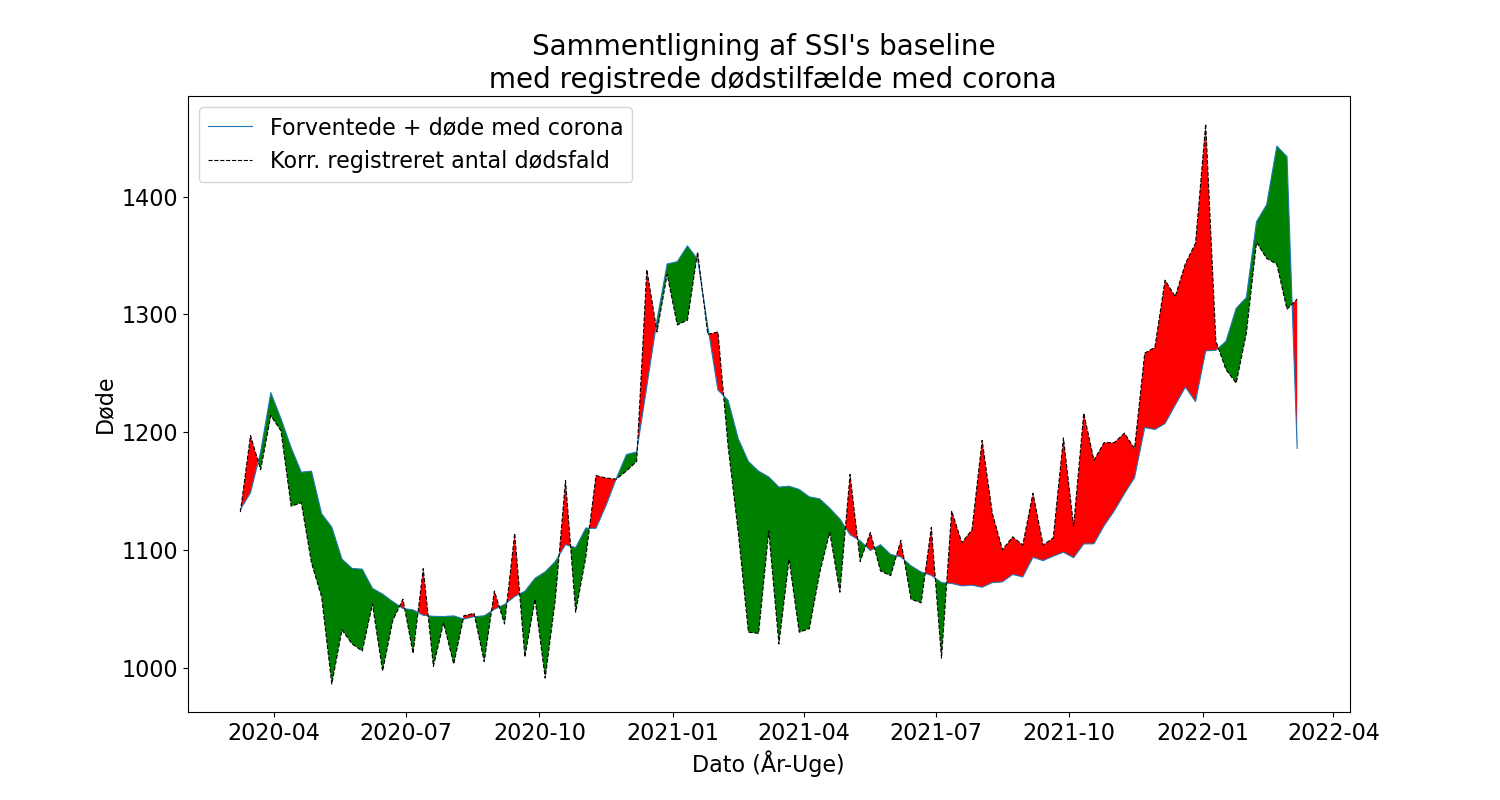

In [23]:
fig, ax1 = plt.subplots(figsize=(15,8))
ax1.plot(df_base_new["dt_dato"],df_base_new["forventet + døde"],label="Forventede + døde med corona",linewidth=0.8)
#ax1.plot(df_base_new["dt_dato"],df_base_new["Forventet antal dødsfald + 2 z-score + døde"],label="Forventede + 2 z-score + døde")
ax1.plot(df_base_new["dt_dato"],df_base_new["Korr. registreret antal dødsfald"],"k--",label="Korr. registreret antal dødsfald",linewidth=0.8)

ax1.legend()
ax1.set_xlabel('Dato (År-Uge)')
ax1.set_ylabel('Døde')
ax1.set_title("Sammentligning af SSI's baseline \n med registrede dødstilfælde med corona")
ax1.fill_between(df_base_new["dt_dato"], df_base_new["forventet + døde"], df_base_new["Korr. registreret antal dødsfald"], where = df_base_new["Korr. registreret antal dødsfald"] > df_base_new["forventet + døde"], 
                facecolor ='red', alpha = 1,interpolate=True)

ax1.fill_between(df_base_new["dt_dato"], df_base_new["forventet + døde"], df_base_new["Korr. registreret antal dødsfald"], where = df_base_new["Korr. registreret antal dødsfald"] < df_base_new["forventet + døde"], 
                facecolor ='green', alpha = 1,interpolate=True)
plt.savefig('death_with_baseline_over_and_under.png', dpi=300)